In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy

script_R = 3.36*10**3
T = 10 ##Kelvin
B = 8.86
c_s = math.sqrt(script_R*T)
M = 1.989e30 ## kg
G = 6.674e-11  ## m^3*kg^-1*s^-2
nsamples = 99


In [2]:
def au_to_meters(au):
    meters = au * 149597870700
    return meters
def meters_to_au(meters):
    au = meters / 149597870700
    return au
def years_to_seconds(years):
    seconds = years * 31557600
    return seconds
def seconds_to_years(seconds):
    years = seconds / 31557600
    return years

In [7]:
path = '/Users/richardanderson/Downloads/planetesimal_project'
x = {}
y = {}
r = {}
rmax = (G*M)/(2*c_s**2)
for i in [1, 2, 3]:
    x[i] = np.array([np.loadtxt(f'{path}/data{i}/testposition/x{j}.txt') for j in range(nsamples)])
    y[i] = np.array([np.loadtxt(f'{path}/data{i}/testposition/y{j}.txt') for j in range(nsamples)])
    r[i] = np.array([np.sqrt(x[i][j]**2+y[i][j]**2) for j in range(nsamples)])


In [9]:
vx = {}
vy = {}
v = {}
rmax = meters_to_au((G*M)/(2*c_s**2))
for i in [1, 2, 3]:
    vx[i] = np.array([np.loadtxt(f'{path}/data{i}/testvelocity/vx{j}.txt') for j in range(nsamples)])
    vy[i] = np.array([np.loadtxt(f'{path}/data{i}/testvelocity/vy{j}.txt') for j in range(nsamples)])
    v[i] = np.array([np.sqrt(vx[i][j]**2+vy[i][j]**2) for j in range(nsamples)])


In [10]:
t = {}
for i in [1, 2, 3]:
    t[i] = np.array([np.loadtxt(f'{path}/data{i}/testtime/t{j}.txt') for j in range(nsamples)])

In [11]:
t[2] == t[1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [12]:
Ecluster = {}
PE = {}
KE = {}
for i in [1, 2, 3]:
    Ecluster[i] = np.array([np.loadtxt(f'{path}/data{i}/testenergy/E{j}.txt') for j in range(nsamples)])
    PE[i] = np.array([np.loadtxt(f'{path}/data{i}/testpe/PE{j}.txt') for j in range(nsamples)])
    KE[i] = np.array([np.loadtxt(f'{path}/data{i}/testke/KE{j}.txt') for j in range(nsamples)])

In [13]:
intvec = np.logspace(-6, 4, 10000)
v_integral = np.loadtxt('./vIntShu.txt')

IntHelper = scipy.interpolate.interp1d(intvec, v_integral, kind = 'cubic')

def get_x_integral(x):
    if x < 10.0**(-6):
        return .467*x**(3/2)
    if x > 100:
        return 2*x
    return IntHelper(x)

In [14]:
c_s = np.sqrt(3.36 * 10.0 ** 3 * 10) * (31557600 / 149597870691)  # AU/YR
c_sms =np.sqrt(3.36 * 10.0 ** 3 * 10) #m/s

def Mp(t):
    return (.98 * c_sms**3 * years_to_seconds(t))/G #kg

def getMenc(r, t):
    x = r/(c_s*t)
    integral = get_x_integral(x)
    return (years_to_seconds(t)*c_sms**3/G)*integral

def Mtot(r, t):
    return getMenc(r, t)+Mp(t)

In [15]:
def trapIntegrateLog(f, xmin, xmax, N):
    s = np.logspace(np.log10(xmin), np.log10(xmax), N)
    fvec = np.zeros(N)
    m = 0
    for i in range(0, N):
        fvec[i] = f(s[i])
    for i in range(0, N-1):
        deltax = s[i+1] - s[i]
        av = (fvec[i+1] + fvec[i])/2
        m = m + deltax*av
    return m

def trapIntegrateLinear(f, xmin, xmax, N):
    s = np.linspace(xmin, xmax, N)
    fvec = np.zeros(N)
    m = 0
    for i in range(0, N):
        fvec[i] = f(s[i])
    for i in range(0, N-1):
        deltax = s[i+1] - s[i]
        av = (fvec[i+1] + fvec[i])/2
        m = m + deltax*av
    return m

def getPhi(r, t): #r in AU, t in years
    rmax_meters = au_to_meters(rmax)
    phi_max = -G*M/rmax_meters
    r_meters = au_to_meters(r)
    if r >= rmax:
        return -G*M/r_meters
    else:
        return phi_max - G*trapIntegrateLog(lambda rp: (Mtot(meters_to_au(rp), t))/rp**2, r_meters, rmax_meters, 10000)

<Figure size 640x480 with 0 Axes>

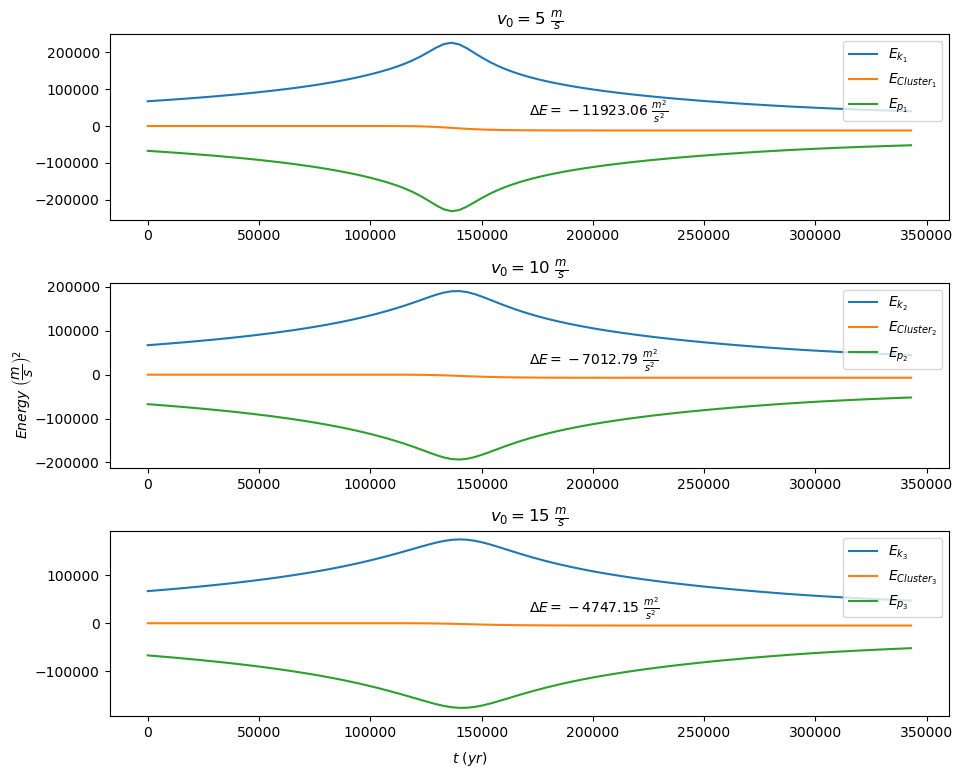

In [16]:
%matplotlib inline
plt.clf()

fig, axs = plt.subplots(3, 1, figsize=(10, 8))

indices = [1, 2, 3]
v0 = {1:5, 2: 10, 3: 15}
for idx, i in enumerate(indices):
    axs[idx].plot(seconds_to_years(t[i]), KE[i], label=f'$E_{{k_{i}}}$')
    axs[idx].plot(seconds_to_years(t[i]), Ecluster[i], label=f'$E_{{Cluster_{i}}}$')
    axs[idx].plot(seconds_to_years(t[i]), PE[i], label=f'$E_{{p_{i}}}$')
    #axs[idx].set_ylim(-5000, 220)
    axs[idx].text(0.5, 0.65, f'$\\Delta E = {Ecluster[i][-1]-Ecluster[i][0]:.2f}\\ \\frac{{m^2}}{{s^2}}$', transform=axs[idx].transAxes, verticalalignment='top')
    axs[idx].legend()
    axs[idx].set_title(f'$v_0 = {v0[i]}\\ \\frac{{m}}{{s}}$')

fig.text(0.5, 0.04, '$t\\ \\left(yr\\right)$', ha='center')
fig.text(0.04, 0.5, '$Energy\\ \\left(\\dfrac{{m}}{{s}}\\right)^2$', va='center', rotation='vertical')
plt.tight_layout(rect=[0.05, 0.05, 1, 1])

plt.show()


In [17]:
rmax

13204.631938845981

<Figure size 640x480 with 0 Axes>

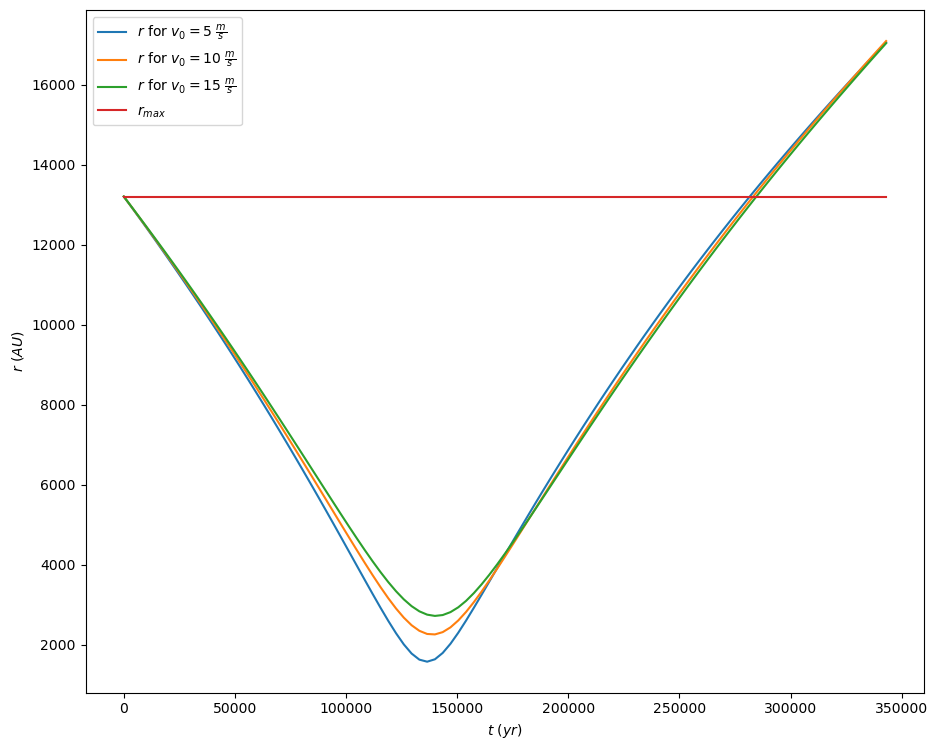

In [18]:
%matplotlib inline

plt.clf()

fig, ax = plt.subplots(figsize=(10, 8))

indices = [1, 2, 3]
v0 = {1: 5, 2: 10, 3: 15}

for i in indices:
    ax.plot(seconds_to_years(t[i]), meters_to_au(r[i]), label=f'$r$ for $v_0 = {v0[i]}\\ \\frac{{m}}{{s}}$')

ax.plot(seconds_to_years(t[i]), np.array([rmax for _ in range(nsamples)]), label=f'$r_{{max}}$')
ax.legend()
#ax.set_title('Distance vs Time for Different Initial Velocities')
ax.set_xlabel('$t\\ \\left(yr\\right)$')
ax.set_ylabel('$r\\ \\left(AU\\right)$')

plt.tight_layout(rect=[0.05, 0.05, 1, 1])

plt.show()



<Figure size 640x480 with 0 Axes>

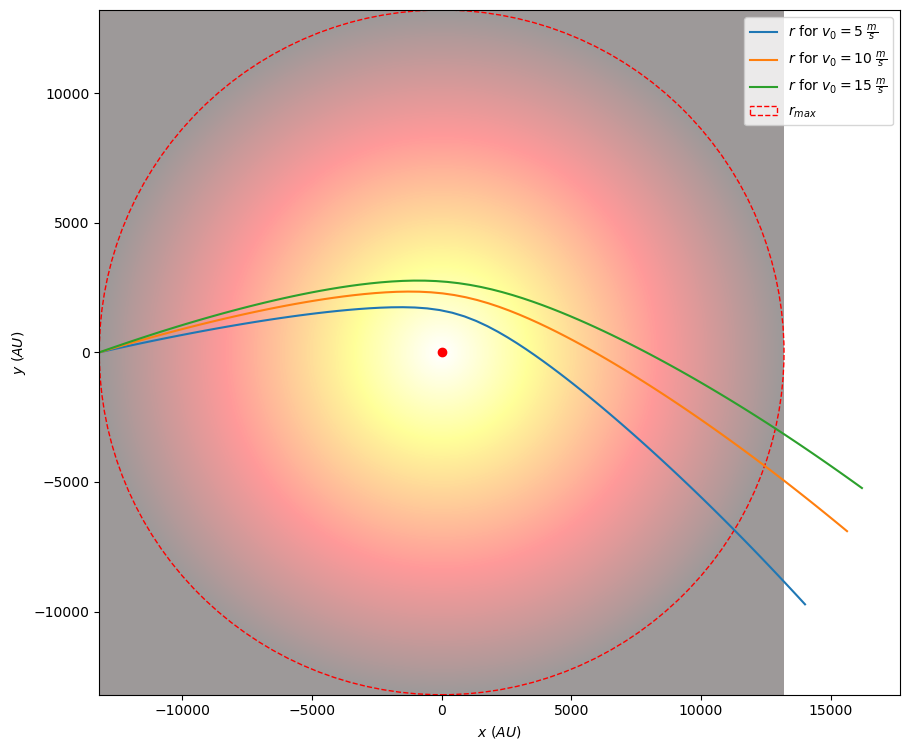

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle

def create_gradient_circle(ax, center, radius, color):
    # Create a grid of points within the circle
    num_points = 500
    x = np.linspace(-radius, radius, num_points)
    y = np.linspace(-radius, radius, num_points)
    X, Y = np.meshgrid(x, y)
    Z = np.sqrt(X**2 + Y**2)
    
    # Create a gradient that is denser in the center and dimmer towards the outside
    gradient = np.clip(1 - Z / radius, 0, 1)
    
    # Plot the gradient
    ax.imshow(gradient, extent=[-radius, radius, -radius, radius], origin='lower', cmap='hot', alpha=0.4)

# Clear the current figure
plt.clf()

# Create a single plot
fig, ax = plt.subplots(figsize=(10, 8))

# Data to plot
indices = [1, 2, 3]
v0 = {1: 5, 2: 10, 3: 15}

for i in indices:
    ax.plot(meters_to_au(x[i]), meters_to_au(y[i]), label=f'$r$ for $v_0 = {v0[i]}\\ \\frac{{m}}{{s}}$')

# Add a gradient-filled circle of radius rmax
create_gradient_circle(ax, (0, 0), rmax, 'r')

# Add the outer circle boundary
circle = Circle((0, 0), rmax, color='r', fill=False, linestyle='--', label='$r_{max}$')
ax.add_patch(circle)

# Plot the origin
ax.plot(0, 0, 'ro')

ax.legend()
ax.set_xlabel('$x\\ \\left(AU\\right)$')
ax.set_ylabel('$y\\ \\left(AU\\right)$')
ax.set_aspect('equal', adjustable='box')  # To ensure the circle is not distorted

plt.tight_layout(rect=[0.05, 0.05, 1, 1])
plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


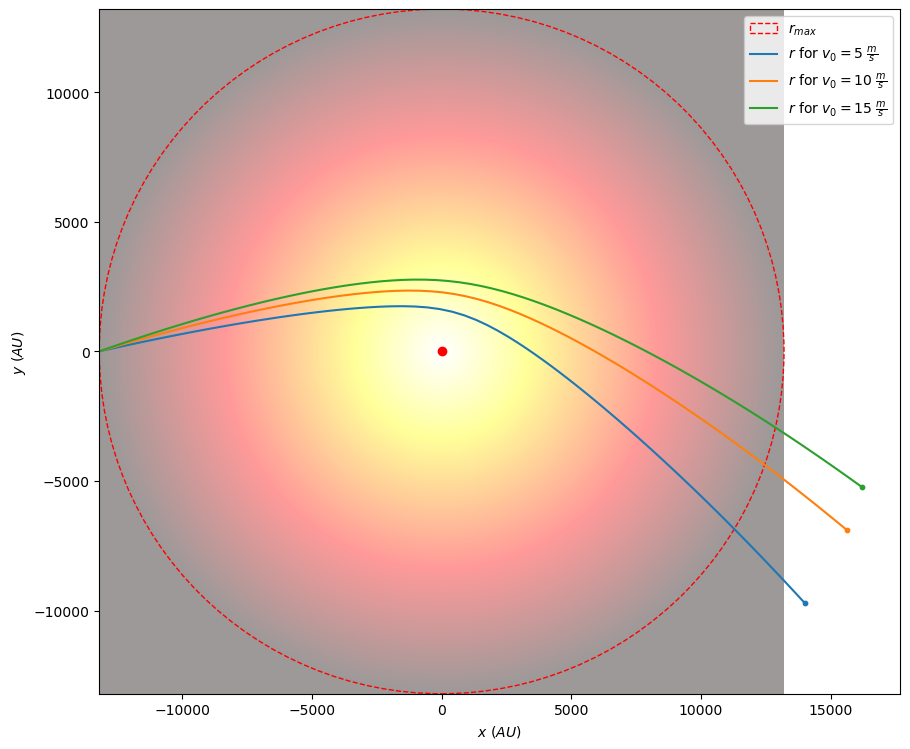

In [53]:
def create_gradient_circle(ax, center, radius, color):
    num_points = 500
    x = np.linspace(-radius, radius, num_points)
    y = np.linspace(-radius, radius, num_points)
    X, Y = np.meshgrid(x, y)
    Z = np.sqrt(X**2 + Y**2)
    
    gradient = np.clip(1 - Z / radius, 0, 1)
    
    ax.imshow(gradient, extent=[-radius, radius, -radius, radius], origin='lower', cmap='hot', alpha=0.4)

def animate(i):
    ax.clear()
    
    create_gradient_circle(ax, (0, 0), rmax, 'r')
    circle = Circle((0, 0), rmax, color='r', fill=False, linestyle='--', label='$r_{max}$')
    ax.add_patch(circle)
    ax.plot(0, 0, 'ro')
    
    for idx in x.keys():
        ax.plot(meters_to_au(x[idx][:i+1]), meters_to_au(y[idx][:i+1]), label=f'$r$ for $v_0 = {v0[idx]}\\ \\frac{{m}}{{s}}$')
        ax.scatter(meters_to_au(x[idx][i]), meters_to_au(y[idx][i]), s=10)
    
    ax.legend()
    ax.set_xlabel('$x\\ \\left(AU\\right)$')
    ax.set_ylabel('$y\\ \\left(AU\\right)$')
    ax.set_aspect('equal', adjustable='box')
    plt.tight_layout(rect=[0.05, 0.05, 1, 1])

# Data to plot
indices = range(len(x[1]))  # Assuming all particles have the same number of positions
v0 = {1: 5, 2: 10, 3: 15}  # Initial velocities as provided

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create animation
ani = FuncAnimation(fig, animate, frames=len(indices), interval=100, blit=False)

# Save the animation as a GIF
output_file = os.path.expanduser('~/Downloads/planetesimal_project/animation.gif')
ani.save(output_file, writer='imagemagick', fps=10)

# Show the animation inline
plt.show()
